# RhizoScan Pipeline

This pipeline is a step by step pipeline

## Common import

In [1]:
%pylab inline
from matplotlib import pyplot as plt
from IPython.display import Image

Populating the interactive namespace from numpy and matplotlib


## RhizoScan Import

In [2]:
from rhizoscan import get_data_path
from rhizoscan.root.pipeline import load_image, detect_petri_plate, compute_graph, compute_tree
from rhizoscan.root.pipeline.arabidopsis import segment_image, detect_leaves
from rhizoscan.root.graph.mtg import tree_to_mtg

## Ajout lessy

In [3]:
from rhizoscan import get_data_path
from matplotlib import pyplot as plt

from skimage import  io
from skimage import filters
import skimage.measure
import numpy as np
import cv2
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from sklearn.cluster import KMeans
################### Rhizoscan ###############################

from matplotlib import pyplot as plt
from IPython.display import Image

from rhizoscan import get_data_path
from rhizoscan.root.pipeline import load_image, detect_petri_plate, compute_graph, compute_tree
from rhizoscan.root.pipeline.arabidopsis import segment_image, detect_leaves
from rhizoscan.root.graph.mtg import tree_to_mtg

########################## load image ###########################################
from skimage.io import imread, call_plugin, plugin_info
from skimage.util.dtype import convert


In [4]:
from cv2 import erode as _erode
from sklearn.cluster import KMeans as _Kmeans

import numpy as _np
import scipy as _sp
from scipy import ndimage as _nd

from rhizoscan.workflow import node as _node         # declare workflow nodes
from rhizoscan.workflow import pipeline as _pipeline # declare workflow pipeline

from rhizoscan.ndarray.measurements import clean_label as _clean_label
from rhizoscan.image                import Image       as _Image


## RSA Image

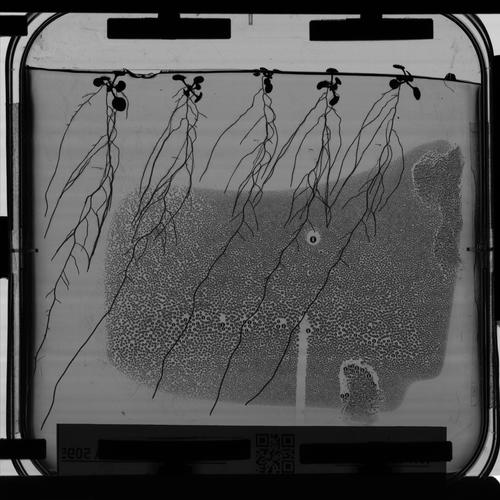

In [5]:
image_filename = get_data_path('pipeline/big.jpg')
Image(image_filename)

### Load Image

In [6]:
########################## load image ###########################################
from skimage.io import imread, call_plugin, plugin_info
from skimage.util.dtype import convert


image_filename = get_data_path('pipeline/big.jpg')



#image = load_image(image_filename)



image = imread(image_filename)
image.dtype
image = convert(image,dtype=np.uint8)


In [7]:
################### crop image #################################"

 #image[hbound[1]:,:] = 0, En bas horizontale

image[430:,:] = 0 

# image[:hbound[0], :] = 0, En haut horizontalement

image[:39,:] = 0

# image[: , :wbound[0] ] = 0, a gauche verticale

image[: , :40] = 0

# image[: , wbound[1]:] = 0 a droite verticalement
image[: , 450:] = 0 


for i in range(5):
      image = cv2.morphologyEx(image,cv2.MORPH_OPEN,(25,25))
     

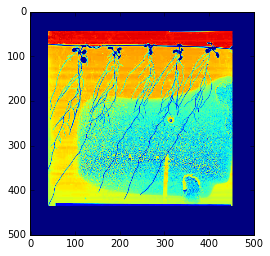

In [8]:
imshow(image)

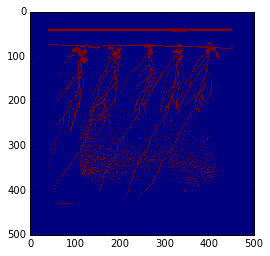

In [9]:
#########################""" Segmentation-Thresholding """##################################

#cv2.adaptivethreshold(src,adaptiveMethod,thresholType,blocksize,c[,dst])



bin_image = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,101,25)

bin_image[430:,:] = 0 
bin_image[:39, :] =  0
bin_image[:, :40] = 0
bin_image[:, 450:] = 0 
imshow(bin_image)

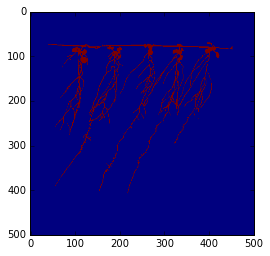

In [10]:
                            
################### Kept biggest connected component ################

label_image = skimage.measure.label(bin_image)
regions     = skimage.measure.regionprops(label_image)

###certaintly the best methods is to kept the area superior to a x define
### value


region = max(regions,key = lambda x: x.area)
im_seg = label_image.copy()

im_seg[im_seg != region.label] = 0

im_seg[im_seg > 0 ] = 255 

im_seg[430: ,:] = 0 
im_seg[:39 , :] = 0
im_seg[: , :40] = 0
im_seg[: ,450:] = 0 

imshow(im_seg)

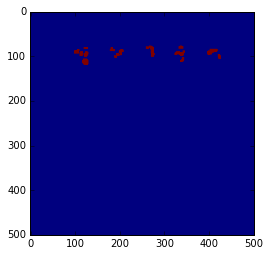

In [11]:
####################detect leaves and seed #################################

# noise removal
#kernel = np.ones((2,2),np.uint8)
kernel = np.ones((2,2))
#for i in range(5):

opening = cv2.morphologyEx(im_seg.astype(np.uint8),cv2.MORPH_OPEN, kernel, iterations = 4)
    
opening[430: ,:] = 0 
opening[:39 , :] = 0
opening[: , :40] = 0
opening[: ,450:] = 0 

imshow(opening)

In [12]:
for i in range(5):
    label_image1 = skimage.measure.label(np.array(opening))
    
regions1     = skimage.measure.regionprops(label_image1)
region1 = max(regions1,key = lambda x: x.area)
img = label_image1.copy()

In [13]:
plant_number = 5
x, y = _np.where(img > 0)

pts = list()
for xx, yy in zip(x, y):
    pts.append((xx, yy))

pts = _np.array(pts, dtype=float)

kmeans = _Kmeans(n_clusters=plant_number).fit(pts)
label = kmeans.labels_

pts = pts.astype(int)

for (x, y), label in zip(list(pts), label):
    img[x, y] = int(label) + 1


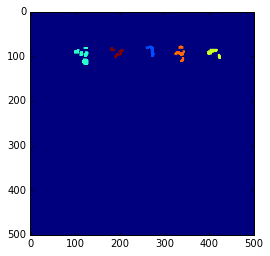

In [14]:
imshow(img)

In [103]:
#imshow(im_seg + img)

## k_means

### Detect leaves and seed

In [1]:

imshow(seed_map+rmask)

NameError: name 'imshow' is not defined

### Compute the graph corresponding to the RSA

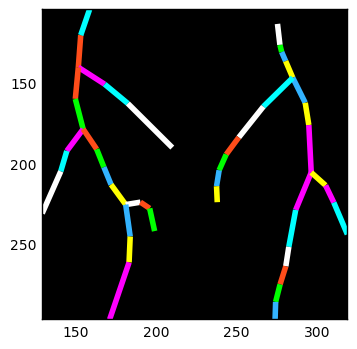

In [8]:
graph = compute_graph(rmask,seed_map,bbox)
graph.plot(linewidth=4)

### Extract a tree from the graph

/home/artzet_s/PycharmProjects/Rhizo/rhizoscan/src/rhizoscan/root/graph/nsa.py:307: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif ids=='auto': self.setdefault('id',_np.arange(self.number()))
/home/artzet_s/PycharmProjects/Rhizo/rhizoscan/src/rhizoscan/root/graph/__init__.py:196: RuntimeWarning: divide by zero encountered in divide
  shifty  = _np.arange(len(axe_node))/ms % (2*ms+1) - ms


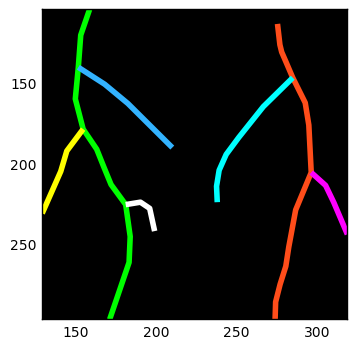

In [9]:
tree = compute_tree(graph, px_scale=px_scale)
tree.plot(linewidth=4)

### Save the RSA into an MTG

In [10]:
g = rsa = tree_to_mtg(tree)
g.display()

MTG : nb_vertices=54, nb_scales=4
/P			(id=1)											
^/A			(id=3)											
^/S			(id=4)											
^<S			(id=5)											
^<S			(id=6)											
	+A			(id=38)										
	^/S			(id=39)										
	^<S			(id=40)										
	^<S			(id=41)										
^<S			(id=7)											
^<S			(id=8)											
	+A			(id=42)										
	^/S			(id=43)										
	^<S			(id=44)										
	^<S			(id=45)										
^<S			(id=9)											
^<S			(id=10)											
^<S			(id=11)											
^<S			(id=12)											
	+A			(id=50)										
	^/S			(id=51)										
	^<S			(id=52)										
	^<S			(id=53)										
^<S			(id=13)											
^<S			(id=14)											
^<S			(id=15)											
/P			(id=2)											
^/A			(id=16)											
^/S			(id=17)											
^<S			(id=18)											
^<S			(id=19)											
^<S			(id=20)											
^<S			(id=21)											
	+A			(id=31)										
	^/S			(id=32)										
	^<S			(id=33)										
	^<S			(id=34)										
	^<S			(id=35)										
	^<S			(id=36)										
	^<S		